In [1]:
import pandas as pd
import pathlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from typing import Tuple
import random

In [2]:
#input_file = str(pathlib.Path.home()) + '/data/log_truth_merge_rootfile/10_dst/truthMatchedDaVinciLog.h5'

s = 0.99
r = 0.99

#io_folder = (
#    str(pathlib.Path.home())
#    + '/data/2D_recovery_studies/increased_covmatrix/s_'
#    + str(s)
#    + '/s_'
#    + str(s)
#    + '_r_'
#    + str(r)
#    + '/')

io_folder = str(pathlib.Path.home()) + '/data/2D_recovery_studies/increased_covmatrix/s_0.99/s_0.99_r_0.99_fixed_scaling/'

input_file = io_folder + 'truthMatchedDaVinciLog.h5' 

save_plots = True

In [3]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 'true_vertex_study/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

In [4]:
converged_color = 'tab:blue'
failed_color = 'tab:orange'

In [5]:
random.seed(10)

# Import data

In [6]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')

In [7]:
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3.142560e+03,3.145090e+03,17.4188,-2.138120e+02,-2.140240e+02,7.316260e+04,7.322090e+04,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9.031320e+03,9.376810e+03,43.3318,3.264650e+01,3.425470e+01,3.185940e+04,3.307610e+04,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-2.886080e+04,-2.887930e+04,787.3740,-2.837230e+04,-2.839180e+04,1.099220e+06,1.099920e+06,1100620.0,4,0.000041
3,0.605712,-0.203051,22.148048,-201.967401,18.675947,3750.945238,0.6057,-0.2032,22.1485,-2763.258205,...,2.693930e+04,2.696010e+04,90.1864,5.198510e+03,5.202890e+03,6.694760e+05,6.699880e+05,670499.0,9,0.000034
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-1.309440e+04,-1.310540e+04,201.6090,6.041500e+03,6.048110e+03,3.405920e+05,3.408790e+05,341166.0,11,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1.101834,-0.738635,67.996642,377.311608,-66.095704,5814.102075,1.1019,-0.7389,67.9972,9031.540332,...,-7.604910e+01,-7.603710e+01,9.2567,-3.611000e+00,-3.618250e+00,2.082420e+03,2.082010e+03,2081.6,10380,20.640507
1181,1.101834,-0.738635,67.996642,377.311608,-66.095704,5814.102075,1.1019,-0.7389,67.9972,9031.540332,...,-7.604910e+01,-7.603710e+01,9.2567,-3.611000e+00,-3.618250e+00,2.082420e+03,2.082010e+03,2081.6,10382,22.826082
1182,1.101834,-0.738635,67.996642,377.311608,-66.095704,5814.102075,1.1019,-0.7389,67.9972,9031.540332,...,-1.279750e+04,-1.286660e+04,38.5827,-1.849800e+03,-1.859920e+03,1.120670e+05,1.126720e+05,113279.0,4793,23.093881
1183,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2.821250e+06,2.826850e+06,525617.0000,-8.721530e+06,-8.738940e+06,1.451330e+08,1.454210e+08,145709000.0,10386,0.000040


# Helper functions

In [8]:
def plot_overlapping_histos(
    df: pd.DataFrame, ## Full DataFrame
    series: pd.Series, ## Series built from df columns. May be a column itself
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True
):
    ## Converged events
    plt.hist(
        series.loc[df['status'] == 'Converged'],
        bins=binning,
        range=boundaries,
        label="Converged",
        histtype='stepfilled',
        edgecolor=converged_color,
        color=mcolors.to_rgba(converged_color, alpha=0.05),
        density=normalized
    )
    
    ## Failed
    plt.hist(
        series.loc[df['status'] == 'NonConverged'],
         bins=binning,
         range=boundaries,
         label="Failed",
         histtype='stepfilled',
         edgecolor=failed_color,
         color=mcolors.to_rgba(failed_color, alpha=0.05),
         density=normalized
    )
    
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

# Study the vertex seed
Now with truth match!

In [9]:
feature_boundary_dictionary = {
    'seed_vtx_X': (-500,500),
    'seed_vtx_Y': (-500,500),
    'seed_vtx_Z': (-1000,10000),
}

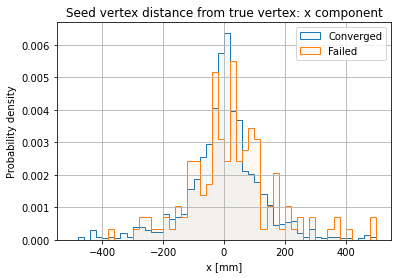

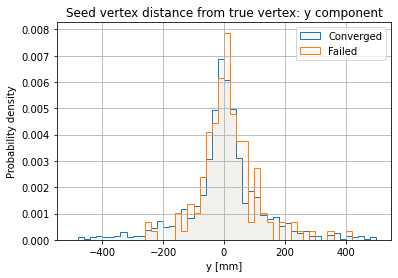

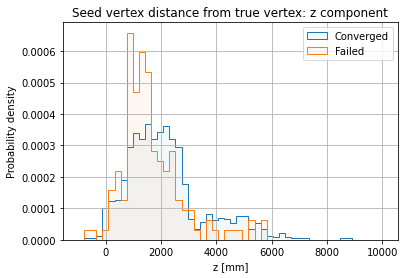

In [10]:
for comp in ['x', 'y', 'z']:
    seed_feature = 'seed_vtx_' + comp.upper()
    true_feature = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()

    plot_args = {
        'axis_label': comp + ' [mm]',
        'plot_title': 'Seed vertex distance from true vertex: ' + comp + " component",
        'file_name': seed_feature,
        'binning': 50,
        'boundaries': feature_boundary_dictionary[seed_feature],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True    
    }

    plot_overlapping_histos(
        df_events,
        df_events[seed_feature] - df_events[true_feature],
        **plot_args)

# Plot event topology

In [11]:
coord_to_vector_comp = {
    'x': 0,
    'y': 1,
    'z': 2
}

coord_to_suffix = {
    'x': '_X',
    'y': '_Y',
    'z': '_Z'
}

coord_to_boundaries = {
    'x': (-2000,2000),
    'y': (-2000,2000),
    'z': (0,9000)
}

In [12]:
def plot_event_plane(
    df: pd.DataFrame,
    event_index: int,
    x_axis: str,
    y_axis: str,
    tight_axes: bool = False,
    show_arrows: bool = True,
    show_true_vertex: bool = True,
    sort_by_x_axis_comp: bool = False,
) -> None:
    %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes()
    
    event = df.iloc[event_index]
    
    x_comp = coord_to_vector_comp[x_axis]
    y_comp = coord_to_vector_comp[y_axis]
    
    ## Note: initial values are broken down in single columns (1 per component).
    ## Iteration values are not (atm). Hence two different techniques.
    vertices = []
    vertices.append([
        event['seed_vtx' + coord_to_suffix[x_axis]],
        event['seed_vtx' + coord_to_suffix[y_axis]]
    ])
    vertices += [[vtx[x_comp], vtx[y_comp]] for vtx in event['iter_currentVertices']]
    
    p_refpoints = []
    p_refpoints.append([
        event['p_refPoint' + coord_to_suffix[x_axis]],
        event['p_refPoint' + coord_to_suffix[y_axis]]
    ])
    p_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_p_refPoint']]
    
    pim_refpoints = []
    pim_refpoints.append([
        event['pim_refPoint' + coord_to_suffix[x_axis]],
        event['pim_refPoint' + coord_to_suffix[y_axis]]
    ])
    pim_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_pim_refPoint']]
    
    if sort_by_x_axis_comp:
        #vertices.sort()
        
        ## Get indices (a.k.a. iteration number) after sorting for fakesies
        #iteration_plot_order = [b[0] for b in sorted(enumerate(p_refpoints), key=lambda i:i[1])]
        ## Now sort for realsies
        p_refpoints.sort()
        pim_refpoints.sort()
        
        ## The following assumes the x component of p_refPoints and pim_refPoints is the same
        ## It will only make sense in zy and zx plots, since z components are shared because
        ## of how transportation is performed. This being said: this entire mode has been
        ## added with those planes in mind.
        #for iteration, refPoint in zip(iteration_plot_order, p_refpoints):
        #    ax.axvline(refPoint[0], color='grey', linestyle='dotted')
    
    ax.plot(*zip(*vertices), color='black', marker='x', linestyle='--', label='Vertex')
    ax.plot(*zip(*p_refpoints), color='tab:red', marker='x', linestyle='-', label='Proton')
    ax.plot(*zip(*pim_refpoints), color='tab:blue', marker='x', linestyle='-', label='Pion')
    
    if show_arrows:
        p_momenta = []
        p_momenta.append([
            event['p_momentum' + coord_to_suffix[x_axis]],
            event['p_momentum' + coord_to_suffix[y_axis]]
        ])
        p_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_p_momentum']]
        
        pim_momenta = []
        pim_momenta.append([
            event['pim_momentum' + coord_to_suffix[x_axis]],
            event['pim_momentum' + coord_to_suffix[y_axis]]
        ])
        pim_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_pim_momentum']]
        
        ax.quiver(*zip(*p_refpoints), *zip(*p_momenta), color='tab:red')
        ax.quiver(*zip(*pim_refpoints), *zip(*pim_momenta), color='tab:blue')
        
    if show_true_vertex:
        mew = 1.5
        
        true_L_endvertex = [
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[x_axis]],
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[y_axis]]
        ]
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            label='True vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )
        
        #true_p_momentum = [
        #    event['MCTRUTH_p_P' + x_axis.upper()],
        #    event['MCTRUTH_p_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_p_momentum, color='tab:red')
        
        #true_pim_momentum = [
        #    event['MCTRUTH_pim_P' + x_axis.upper()],
        #    event['MCTRUTH_pim_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_pim_momentum, color='tab:blue')
        
    ax.set_xlabel(x_axis + " [mm]")
    ax.set_ylabel(y_axis + " [mm]")
    ax.grid()
    ax.set_title("Event " + str(event_index) + " (" + event['status'] + ")\n$" + x_axis + y_axis + "$ plane topology")
    
    if not tight_axes:
        ax.set_xlim(coord_to_boundaries[x_axis])
        ax.set_ylim(coord_to_boundaries[y_axis])
        
    ax.legend(loc='best')
    
    if save_plots:
        file_name = 'evt_' + str(event_index) + '_' + x_axis + y_axis
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [13]:
def plot_all_event_planes(
    df: pd.DataFrame,
    event_index: int,
    tight_axes: bool = False,
    show_arrows: bool = True,
    show_true_vertex: bool = True
) -> None:
    
    common_arguments = {
        'tight_axes': tight_axes,
        'show_arrows': show_arrows,
        'show_true_vertex': show_true_vertex
    }
    
    plot_event_plane(df, event_index, 'x', 'y', sort_by_x_axis_comp=False, **common_arguments)
    plot_event_plane(df, event_index, 'z', 'x', sort_by_x_axis_comp=True, **common_arguments)
    plot_event_plane(df, event_index, 'z', 'y', sort_by_x_axis_comp=True, **common_arguments)
    
    #PlotEvent3DPlane(index, interactive=False, tightAxes=tightAxes, showArrows=showArrows)

In [14]:
def plot_event_plane_2D(
    df: pd.DataFrame,
    event_index: int,
    x_axis: str,
    y_axis: str,
    tight_axes: bool = False,
    show_true_vertex: bool = True,
    show_final_vertex: bool = False,
    sort_by_x_axis_comp: bool = False,
) -> None:
    %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes()
    
    event = df.iloc[event_index]
    
    if pd.isna(event['status_2D']):
        raise ValueError("Event " + str(event_index) + " has not undergone a 2D refit.")
    
    x_comp = coord_to_vector_comp[x_axis]
    y_comp = coord_to_vector_comp[y_axis]
    
    ## Note: initial values are broken down in single columns (1 per component).
    ## Iteration values are not (atm). Hence two different techniques.
    vertices = []
    vertices.append([
        event['seed_vtx_2D'][x_comp],
        event['seed_vtx_2D'][y_comp]
    ])
    vertices += [[vtx[x_comp], vtx[y_comp]] for vtx in event['iter_currentVertices_2D']]
    
    p_refpoints = []
    p_refpoints.append([
        event['p_refPoint_2D'][x_comp],
        event['p_refPoint_2D'][y_comp]
    ])
    p_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_p_refPoint_2D']]
    
    pim_refpoints = []
    pim_refpoints.append([
        event['pim_refPoint_2D'][x_comp],
        event['pim_refPoint_2D'][y_comp]
    ])
    pim_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_pim_refPoint_2D']]
    
    if sort_by_x_axis_comp:
        #vertices.sort()
        
        ## Get indices (a.k.a. iteration number) after sorting for fakesies
        #iteration_plot_order = [b[0] for b in sorted(enumerate(p_refpoints), key=lambda i:i[1])]
        ## Now sort for realsies
        p_refpoints.sort()
        pim_refpoints.sort()
        
        ## The following assumes the x component of p_refPoints and pim_refPoints is the same
        ## It will only make sense in zy and zx plots, since z components are shared because
        ## of how transportation is performed. This being said: this entire mode has been
        ## added with those planes in mind.
        #for iteration, refPoint in zip(iteration_plot_order, p_refpoints):
        #    ax.axvline(refPoint[0], color='grey', linestyle='dotted')
    
    ax.plot(*zip(*vertices), color='black', marker='x', linestyle='--', label='Vertex')
    ax.plot(*zip(*p_refpoints), color='tab:red', marker='x', linestyle='-', label='Proton')
    ax.plot(*zip(*pim_refpoints), color='tab:blue', marker='x', linestyle='-', label='Pion')
    
#    if show_arrows:
#        p_momenta = []
#        p_momenta.append([
#            event['p_momentum_2D'][x_comp],
#            event['p_momentum_2D'][y_comp],
#        ])
#        p_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_p_momentum_2D']]
#        
#        pim_momenta = []
#        pim_momenta.append([
#            event['pim_momentum' + coord_to_suffix[x_axis]],
#            event['pim_momentum' + coord_to_suffix[y_axis]]
#        ])
#        pim_momenta += [[mom[x_comp], mom[y_comp]] for mom in event['iter_pim_momentum_2D']]
#        
#        ax.quiver(*zip(*p_refpoints), *zip(*p_momenta), color='tab:red')
#        ax.quiver(*zip(*pim_refpoints), *zip(*pim_momenta), color='tab:blue')
        
    if show_true_vertex:
        mew = 1.5
        
        true_L_endvertex = [
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[x_axis]],
            event['MCTRUTH_L_ENDVERTEX' + coord_to_suffix[y_axis]]
        ]
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            label='True vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *true_L_endvertex,
            color='tab:green',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )
        
        #true_p_momentum = [
        #    event['MCTRUTH_p_P' + x_axis.upper()],
        #    event['MCTRUTH_p_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_p_momentum, color='tab:red')
        
        #true_pim_momentum = [
        #    event['MCTRUTH_pim_P' + x_axis.upper()],
        #    event['MCTRUTH_pim_P' + y_axis.upper()]
        #]
        #ax.quiver(*true_L_endvertex, *true_pim_momentum, color='tab:blue')
    
    if show_final_vertex:
        mew = 1.5
        
        last_L_endvertex = [
            event['iter_currentVertices_2D'][-1][x_comp],
            event['iter_currentVertices_2D'][-1][y_comp]
        ]
        
        ax.plot(
            *last_L_endvertex,
            color='tab:orange',
            label='Final vertex position',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *last_L_endvertex,
            color='tab:orange',
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )    
        
    ax.set_xlabel(x_axis + " [mm]")
    ax.set_ylabel(y_axis + " [mm]")
    ax.grid()
    ax.set_title("Event " + str(event_index) + " (" + event['status_2D'] + ")\n2D-algorithm $" + x_axis + y_axis + "$ plane topology")
    
    if not tight_axes:
        ax.set_xlim(coord_to_boundaries[x_axis])
        ax.set_ylim(coord_to_boundaries[y_axis])
        
    ax.legend(loc='best')
    
    if save_plots:
        file_name = 'evt_' + str(event_index) + '_2D_' + x_axis + y_axis
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [15]:
def plot_all_event_planes_2D(
    df: pd.DataFrame,
    event_index: int,
    tight_axes: bool = False,
    show_true_vertex: bool = True,
    show_final_vertex: bool = False
) -> None:
    
    common_arguments = {
        'tight_axes': tight_axes,
        'show_true_vertex': show_true_vertex,
        'show_final_vertex': show_final_vertex
    }
    
    plot_event_plane_2D(df, event_index, 'x', 'y', sort_by_x_axis_comp=False, **common_arguments)
    plot_event_plane_2D(df, event_index, 'z', 'x', sort_by_x_axis_comp=True, **common_arguments)
    plot_event_plane_2D(df, event_index, 'z', 'y', sort_by_x_axis_comp=True, **common_arguments)

## Some random non-converged events

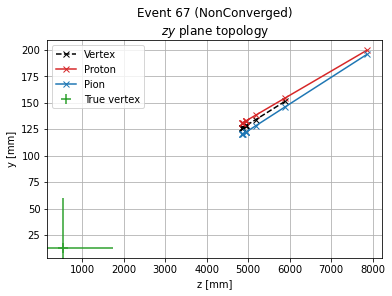

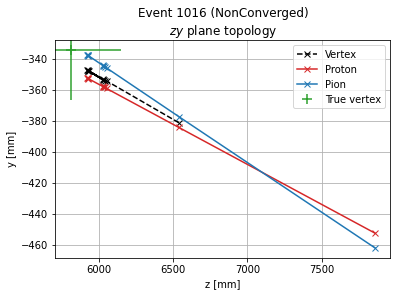

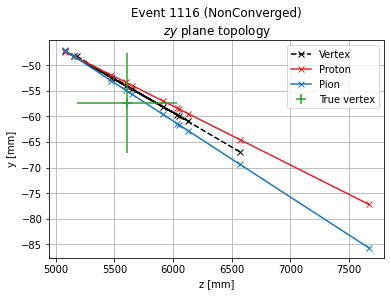

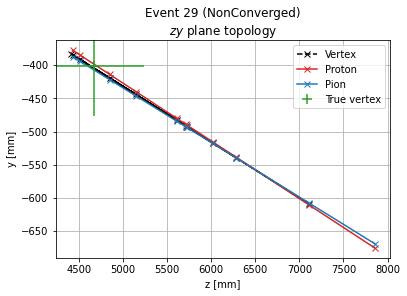

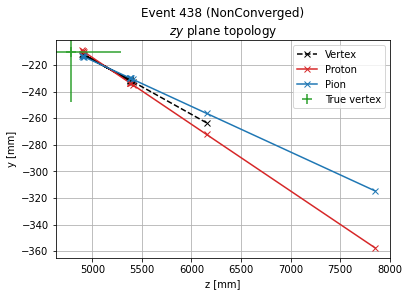

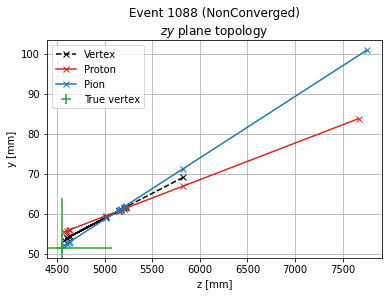

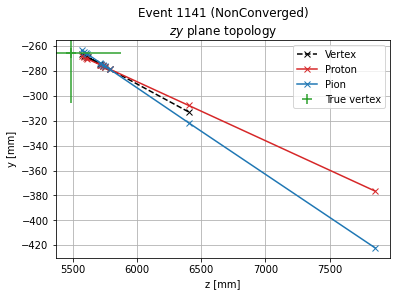

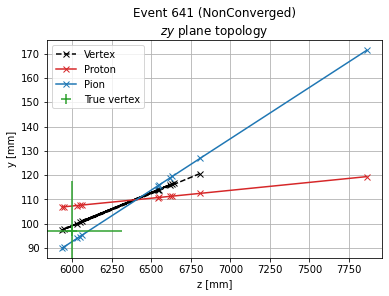

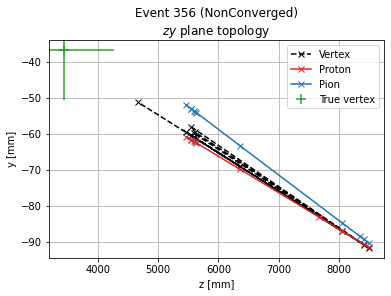

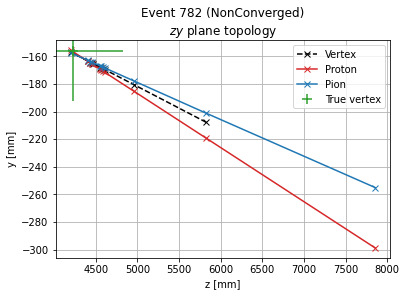

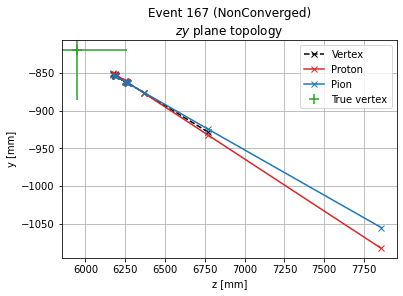

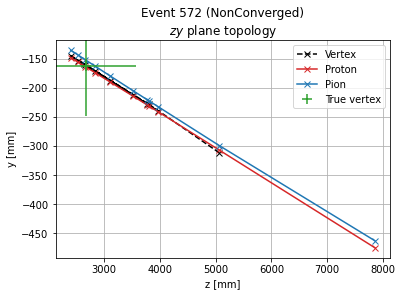

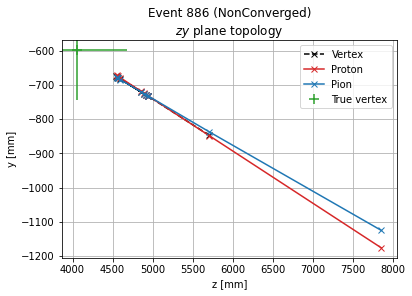

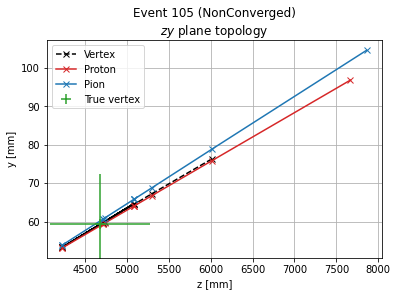

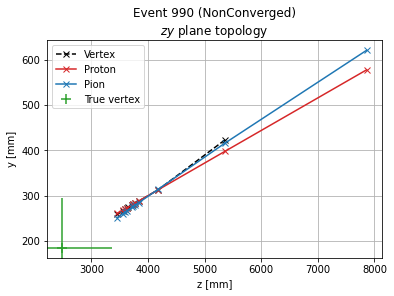

In [16]:
non_conv_indices = list(df_events.loc[(df_events['status'] == 'NonConverged') & (df_events['status_2D'] == 'Converged2D')].index)

for index in random.sample(non_conv_indices, 15):
    plot_event_plane(df_events, index,'z','y', tight_axes=True, show_arrows=False, show_true_vertex=True, sort_by_x_axis_comp=True)    

## More specific events

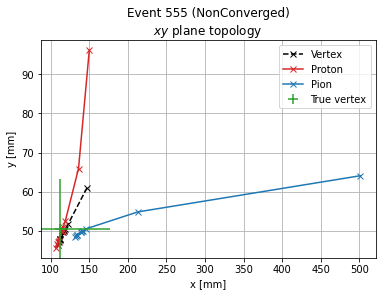

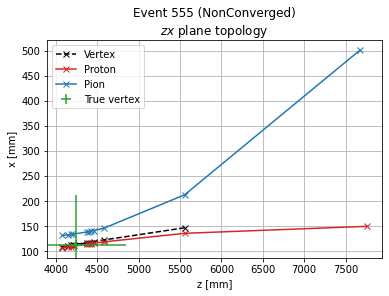

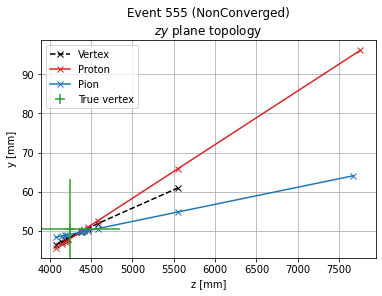

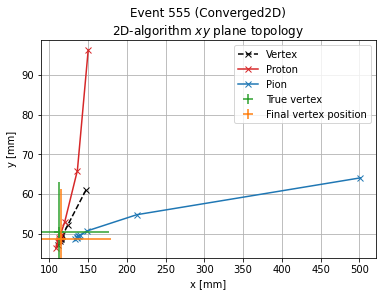

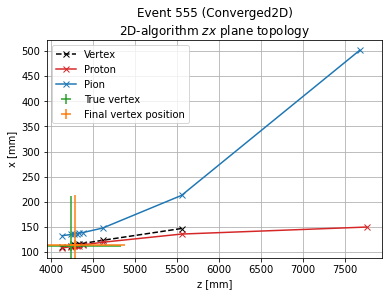

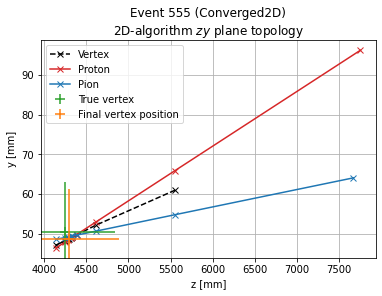

In [17]:
event_index = 555

plot_all_event_planes(df_events, event_index, tight_axes=True, show_arrows=False, show_true_vertex=True)
plot_all_event_planes_2D(df_events, event_index, tight_axes=True, show_true_vertex=True, show_final_vertex=True)